# Capstone Project - Predicting The Risk Of Customer Churn 

## Exploratory Data Analysis
***

### Author - Oyeronke Ayansola

### Date - 12/12/2022

### <font color=red> Notebook #3</font>
***

## Table of Contents
### [Model Goal](##ModelGoal)
### [Import Libraries And Data](##ImportLibrariesAndData)
### [Categorical and Numeric Columns Separation](##CategoricalandNumericColumnsSeparation)
### [Categorical to Numerical Variables](##CategoricaltoNumericalVariables)
### [Other EDA](##OtherEDA)
### [Conclusion](##Conclusion)
***

### Goal

The main objective of this notebook is to use the engineered dataset from notebook 2 to gain an insight into the data and explore the profiled churn customers with other variables. 
***

### Import Libraries And Data

As before, we will need to import all the libraries that we will be using.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
# import data from notebook 2
df = pd.read_csv('df2_engineered.csv')

In [3]:
# check the first few rows
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_latitude,customer_longitude,order_id,order_status,payment_sequential,...,shipping_limit_month,review_creation_month,review_answer_month,order_purchase_day,order_delivered_carrier_day,order_delivered_customer_day,order_estimated_delivery_day,shipping_limit_day,review_creation_day,review_answer_day
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509898,-47.397866,00e7ee1b050b8499577073aeb2a297a1,delivered,1.0,...,5,5,5,16,23,25,5,22,26,30
1,5dca924cc99eea2dc5ba40d11ec5dd0f,2761fee7f378f0a8d7682d8a3fa07ab1,14409,franca,SP,-20.509898,-47.397866,95261f608a64bbbe760a212b4d48a4ee,delivered,1.0,...,6,6,6,15,18,21,5,19,22,26
2,661897d4968f1b59bfff74c7eb2eb4fc,d06a495406b79cb8203ea21cc0942f8c,14409,franca,SP,-20.509898,-47.397866,9444fa2ab50a3f5af63b48be297eda24,delivered,1.0,...,9,9,9,9,11,18,2,14,19,20
3,702b62324327ccba20f1be3465426437,8b3d988f330c1d1c3332ccd440c147b7,14409,franca,SP,-20.509898,-47.397866,dceb8e88274c6f42a88a76ed979eb817,delivered,1.0,...,3,3,11,26,27,28,12,30,29,4
4,bdf997bae7ca819b0415f5174d6b4302,866755e25db620f8d7e81b351a15bb2f,14409,franca,SP,-20.509898,-47.397866,6ee1cea1b2edcc713f83ebfbccbc57f9,delivered,1.0,...,2,4,4,29,31,3,9,8,8,8


In [4]:
# see the shape
df.shape

(96035, 68)

In [5]:
# check for duplicates
df['order_id'].duplicated().sum()

0

In [6]:
# check data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96035 entries, 0 to 96034
Data columns (total 68 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     96035 non-null  object 
 1   customer_unique_id              96035 non-null  object 
 2   customer_zip_code_prefix        96035 non-null  int64  
 3   customer_city                   96035 non-null  object 
 4   customer_state                  96035 non-null  object 
 5   customer_latitude               96035 non-null  float64
 6   customer_longitude              96035 non-null  float64
 7   order_id                        96035 non-null  object 
 8   order_status                    96035 non-null  object 
 9   payment_sequential              96035 non-null  float64
 10  payment_type                    96035 non-null  object 
 11  payment_installments            96035 non-null  float64
 12  payment_value                   

### Categorical and Numeric Columns Separation

As seen from the data information, there are columns with `object` data type. These columns are categorical variables. We will separate them from the numeric variables, these are `int` and `float` data types, then evaluate the statistical summary of our data.

In [7]:
# Get all the categorical columns in one dataframe

categorical_columns = df.select_dtypes("object")
categorical_columns.head()

,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,payment_type,product_id,seller_id,review_id,product_category_name,product_category_name_english,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,credit_card,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,88b8b52d46df026a9d1ad2136a59b30b,moveis_escritorio,office_furniture,itaquaquecetuba,SP
1,5dca924cc99eea2dc5ba40d11ec5dd0f,2761fee7f378f0a8d7682d8a3fa07ab1,franca,SP,95261f608a64bbbe760a212b4d48a4ee,delivered,credit_card,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,16a27e5ffd29a7cdf0e4984b0cab46b7,cama_mesa_banho,bed_bath_table,ibitinga,SP
2,661897d4968f1b59bfff74c7eb2eb4fc,d06a495406b79cb8203ea21cc0942f8c,franca,SP,9444fa2ab50a3f5af63b48be297eda24,delivered,credit_card,83fe1ea6fd12c51fcd341a9968e65cc3,a3a38f4affed601eb87a97788c949667,23be511c12a57fe4052555f9c8905d8b,brinquedos,toys,joinville,SC
3,702b62324327ccba20f1be3465426437,8b3d988f330c1d1c3332ccd440c147b7,franca,SP,dceb8e88274c6f42a88a76ed979eb817,delivered,credit_card,ccb3df28522945422e24b108603a1d04,39d54ff918774174706fb065d7f9dc07,e0fd752f37c8c6866ceb53b79b0715f6,automotivo,auto,sao paulo,SP
4,bdf997bae7ca819b0415f5174d6b4302,866755e25db620f8d7e81b351a15bb2f,franca,SP,6ee1cea1b2edcc713f83ebfbccbc57f9,delivered,credit_card,cb7d42475660f66a519c76f55715cd32,bd0a1b0aadca9a83d9304f7e8ff5fbd5,51fb9267e6687e5ab21e4539999188ed,telefonia,telephony,sao paulo,SP


How many categorical columns do we have? Lets have a look.

In [8]:
# list the columns
list(enumerate(categorical_columns, start=1))    

[(1, 'customer_id'),
 (2, 'customer_unique_id'),
 (3, 'customer_city'),
 (4, 'customer_state'),
 (5, 'order_id'),
 (6, 'order_status'),
 (7, 'payment_type'),
 (8, 'product_id'),
 (9, 'seller_id'),
 (10, 'review_id'),
 (11, 'product_category_name'),
 (12, 'product_category_name_english'),
 (13, 'seller_city'),
 (14, 'seller_state')]

In [9]:
# drop Ids columns
categorical_columns.drop(['seller_id', 'review_id', 'product_id','customer_unique_id',
                                                'order_id', 'customer_id'], axis=1, inplace = True)

In [10]:
# sanity check
list(enumerate(categorical_columns, start=1))

[(1, 'customer_city'),
 (2, 'customer_state'),
 (3, 'order_status'),
 (4, 'payment_type'),
 (5, 'product_category_name'),
 (6, 'product_category_name_english'),
 (7, 'seller_city'),
 (8, 'seller_state')]

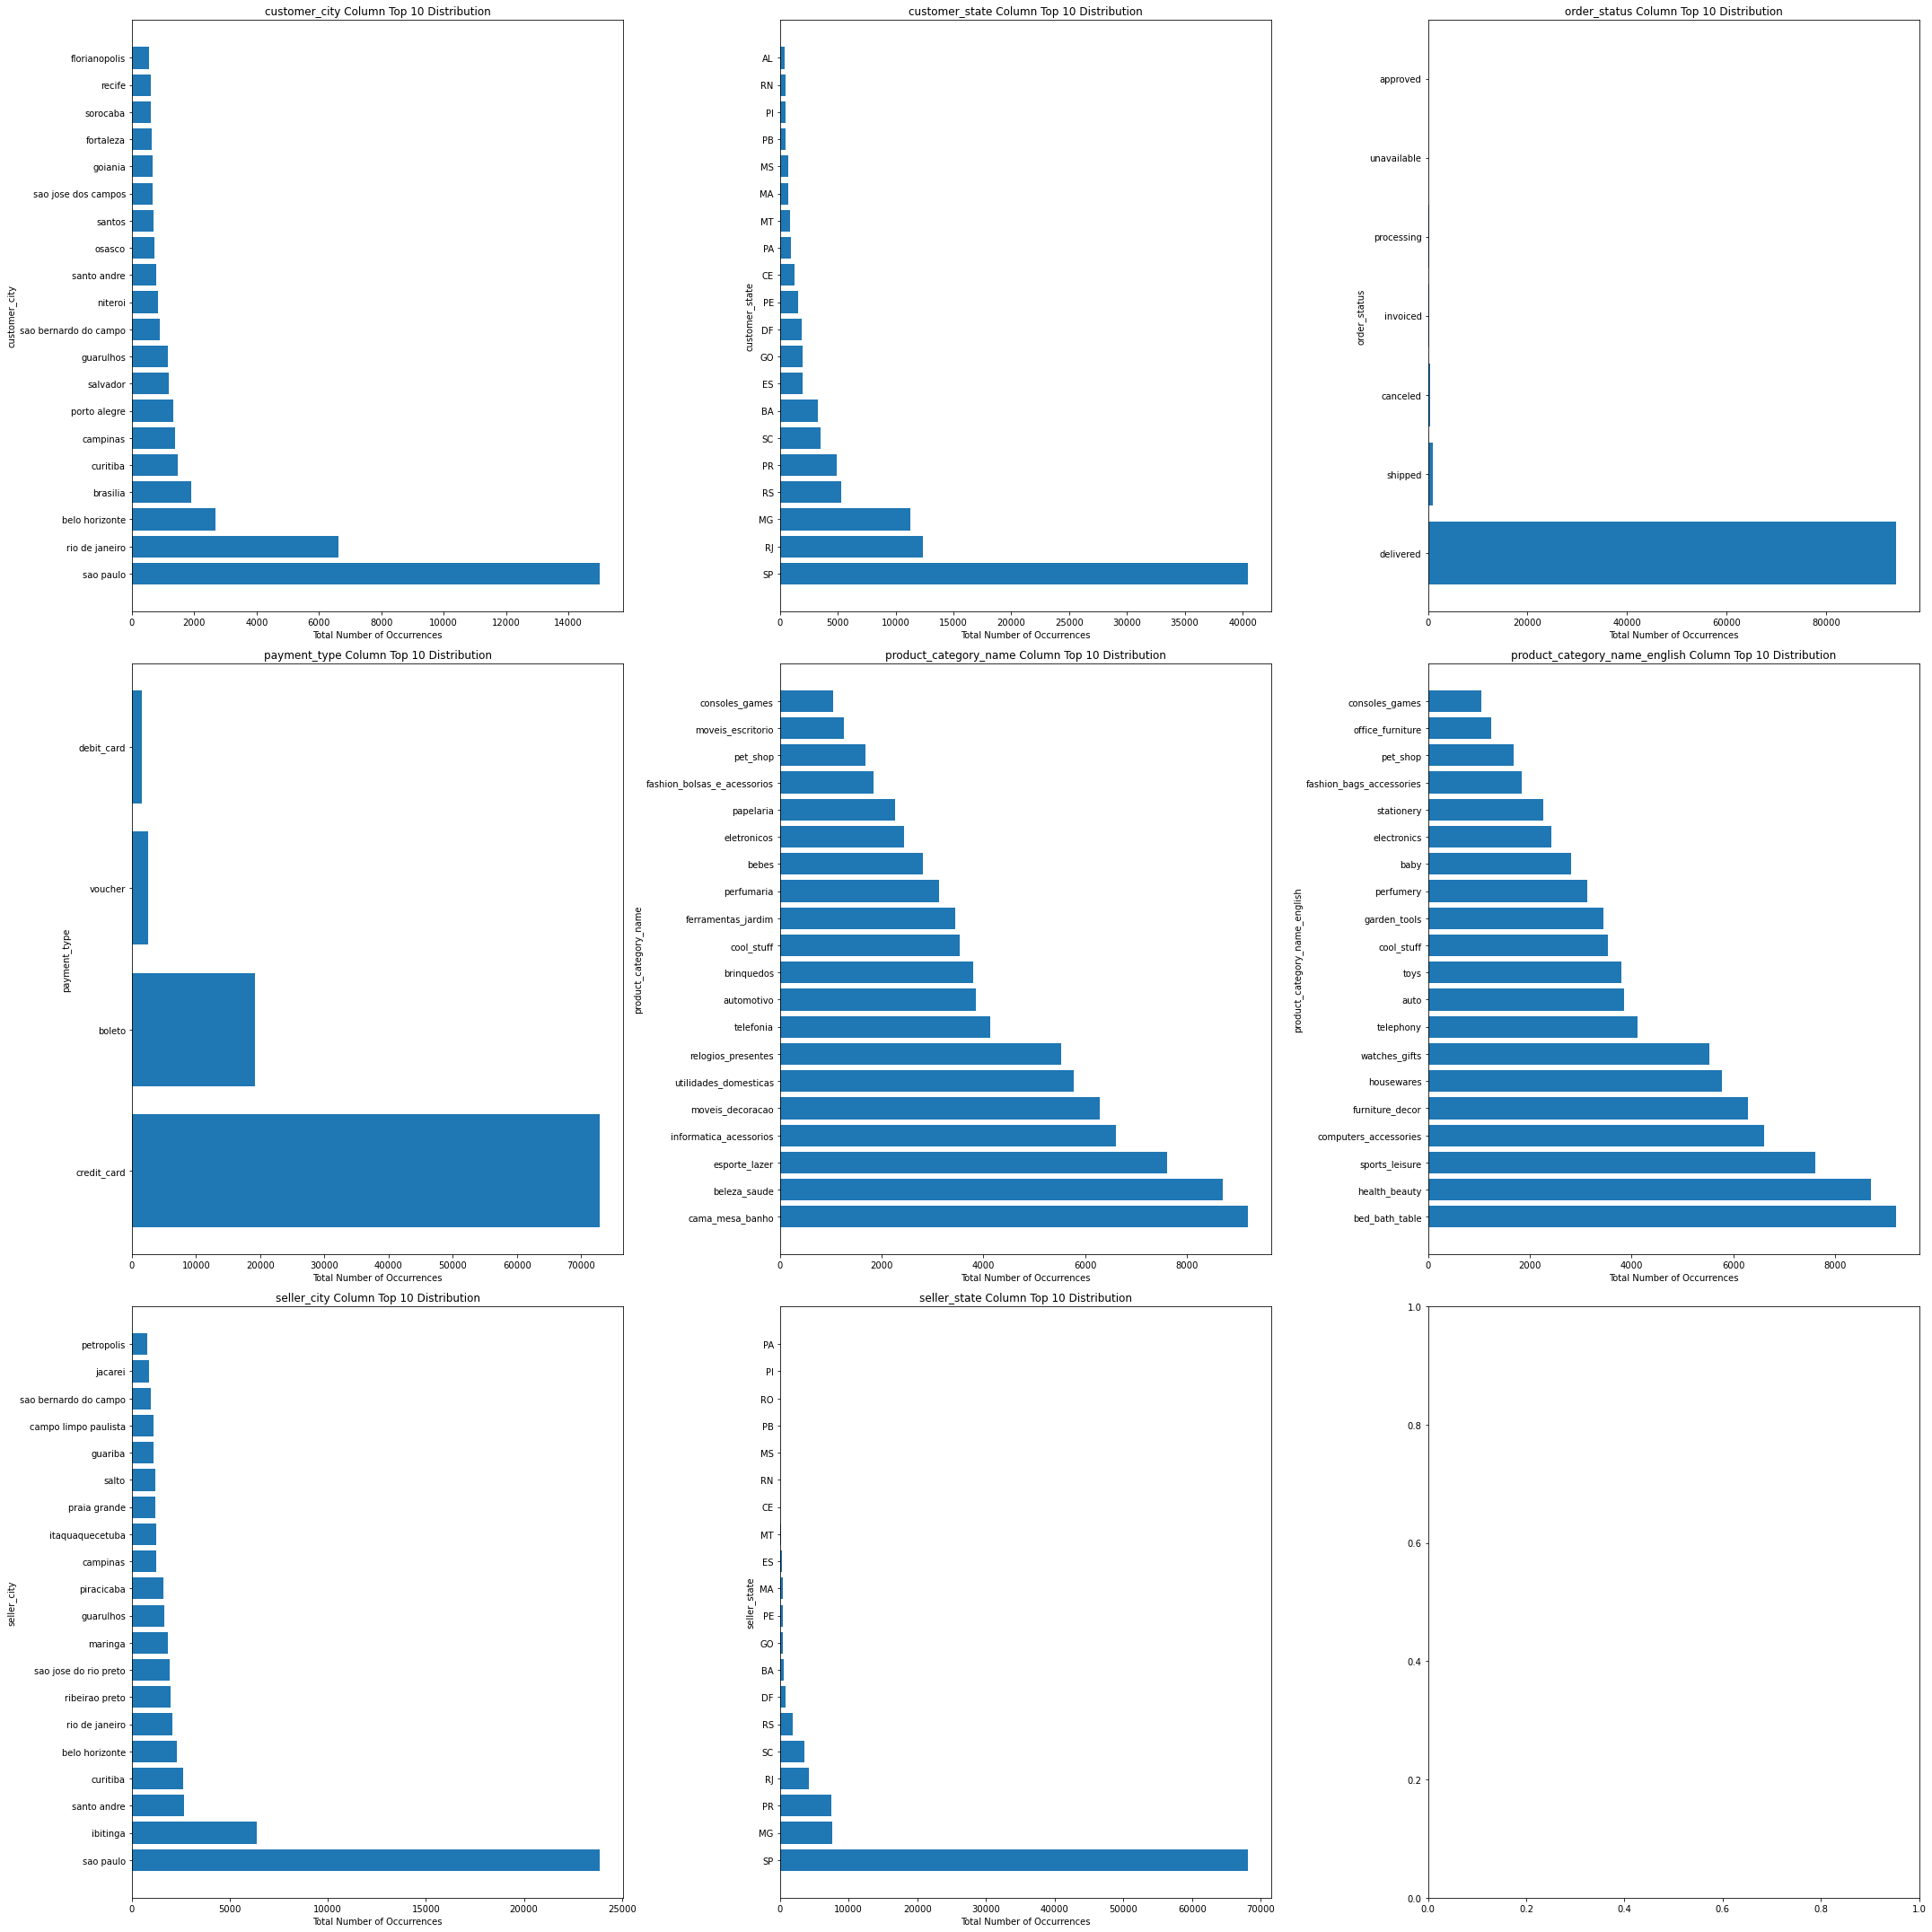

In [11]:
# plot top 20 categorical variables 

plt.subplots(3,3, figsize=(30,30))

for cat_col, col in enumerate(categorical_columns, start=1):

  plt.subplot(3, 3, cat_col)
  plt.barh(categorical_columns[col].value_counts().head(20).index,
           categorical_columns[col].value_counts().head(20).values)
  
  plt.xlabel("Total Number of Occurrences")
  plt.ylabel(col)
  plt.title(f"{col} Column Top 10 Distribution")

plt.tight_layout()
plt.show()
     

From the distribution of categorical column:
1. Sao Paulo has the highest distribution followed by Rio De Janeiro for both city and state.
2. Majority of the orders were delivered, we have very small number where it was recorded as being shipped, really low for cancelled, invoiced, processing, unavailable and approved.
3. We have four classes of payment types; credit card being the highest, followed by boleto but with a very wide gap and voucher and debit card at a very low distribution.
4. Product category - for furnitures and bath (bed, bath, table) has the highest number of occurrence, followed by health and beauty and sport leisure. But from the overall outlook, beauty and health products, electronics, furnitures and housewares seems to be the top 20 most performing products.
5. Sao Paulo city seems to be the most concentrated for sellers followed (with a large margin) by Ibitinga.

Let us generate a dataframe and explore the numeric columns as well.

In [12]:
# Get all the numeric columns in one dataframe

numeric_df = df.select_dtypes('float64', 'int64')
numeric_df.head()

,customer_latitude,customer_longitude,payment_sequential,payment_installments,payment_value,order_item_id,price,freight_value,review_score,product_name_length,...,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_latitude,seller_longitude,total_item_per_customer,total_customer_price,total_frieght_price,total_customer_cost,monetary
0,-20.509898,-47.397866,1.0,2.0,146.87,1.0,124.99,21.88,4.0,41.0,...,64.0,31.0,8577.0,-23.482623,-46.374490,1.0,124.99,21.88,146.87,146.87
1,-20.509898,-47.397866,1.0,8.0,94.77,1.0,79.90,14.87,5.0,54.0,...,10.0,40.0,14940.0,-21.766477,-48.831547,1.0,79.90,14.87,94.77,94.77
2,-20.509898,-47.397866,1.0,1.0,62.50,1.0,44.90,17.60,5.0,40.0,...,7.0,26.0,89204.0,-26.283149,-48.851285,1.0,44.90,17.60,62.50,62.50
3,-20.509898,-47.397866,1.0,3.0,32.69,1.0,19.90,12.79,5.0,46.0,...,14.0,15.0,4243.0,-23.626269,-46.586534,1.0,19.90,12.79,32.69,32.69
4,-20.509898,-47.397866,1.0,1.0,77.01,1.0,63.90,13.11,5.0,51.0,...,7.0,15.0,1212.0,-23.537511,-46.637057,1.0,63.90,13.11,77.01,77.01


In [13]:
# list the columns
list(enumerate(numeric_df, start=1))

[(1, 'customer_latitude'),
 (2, 'customer_longitude'),
 (3, 'payment_sequential'),
 (4, 'payment_installments'),
 (5, 'payment_value'),
 (6, 'order_item_id'),
 (7, 'price'),
 (8, 'freight_value'),
 (9, 'review_score'),
 (10, 'product_name_length'),
 (11, 'product_description_length'),
 (12, 'product_photos_qty'),
 (13, 'product_weight_g'),
 (14, 'product_length_cm'),
 (15, 'product_height_cm'),
 (16, 'product_width_cm'),
 (17, 'seller_zip_code_prefix'),
 (18, 'seller_latitude'),
 (19, 'seller_longitude'),
 (20, 'total_item_per_customer'),
 (21, 'total_customer_price'),
 (22, 'total_frieght_price'),
 (23, 'total_customer_cost'),
 (24, 'monetary')]

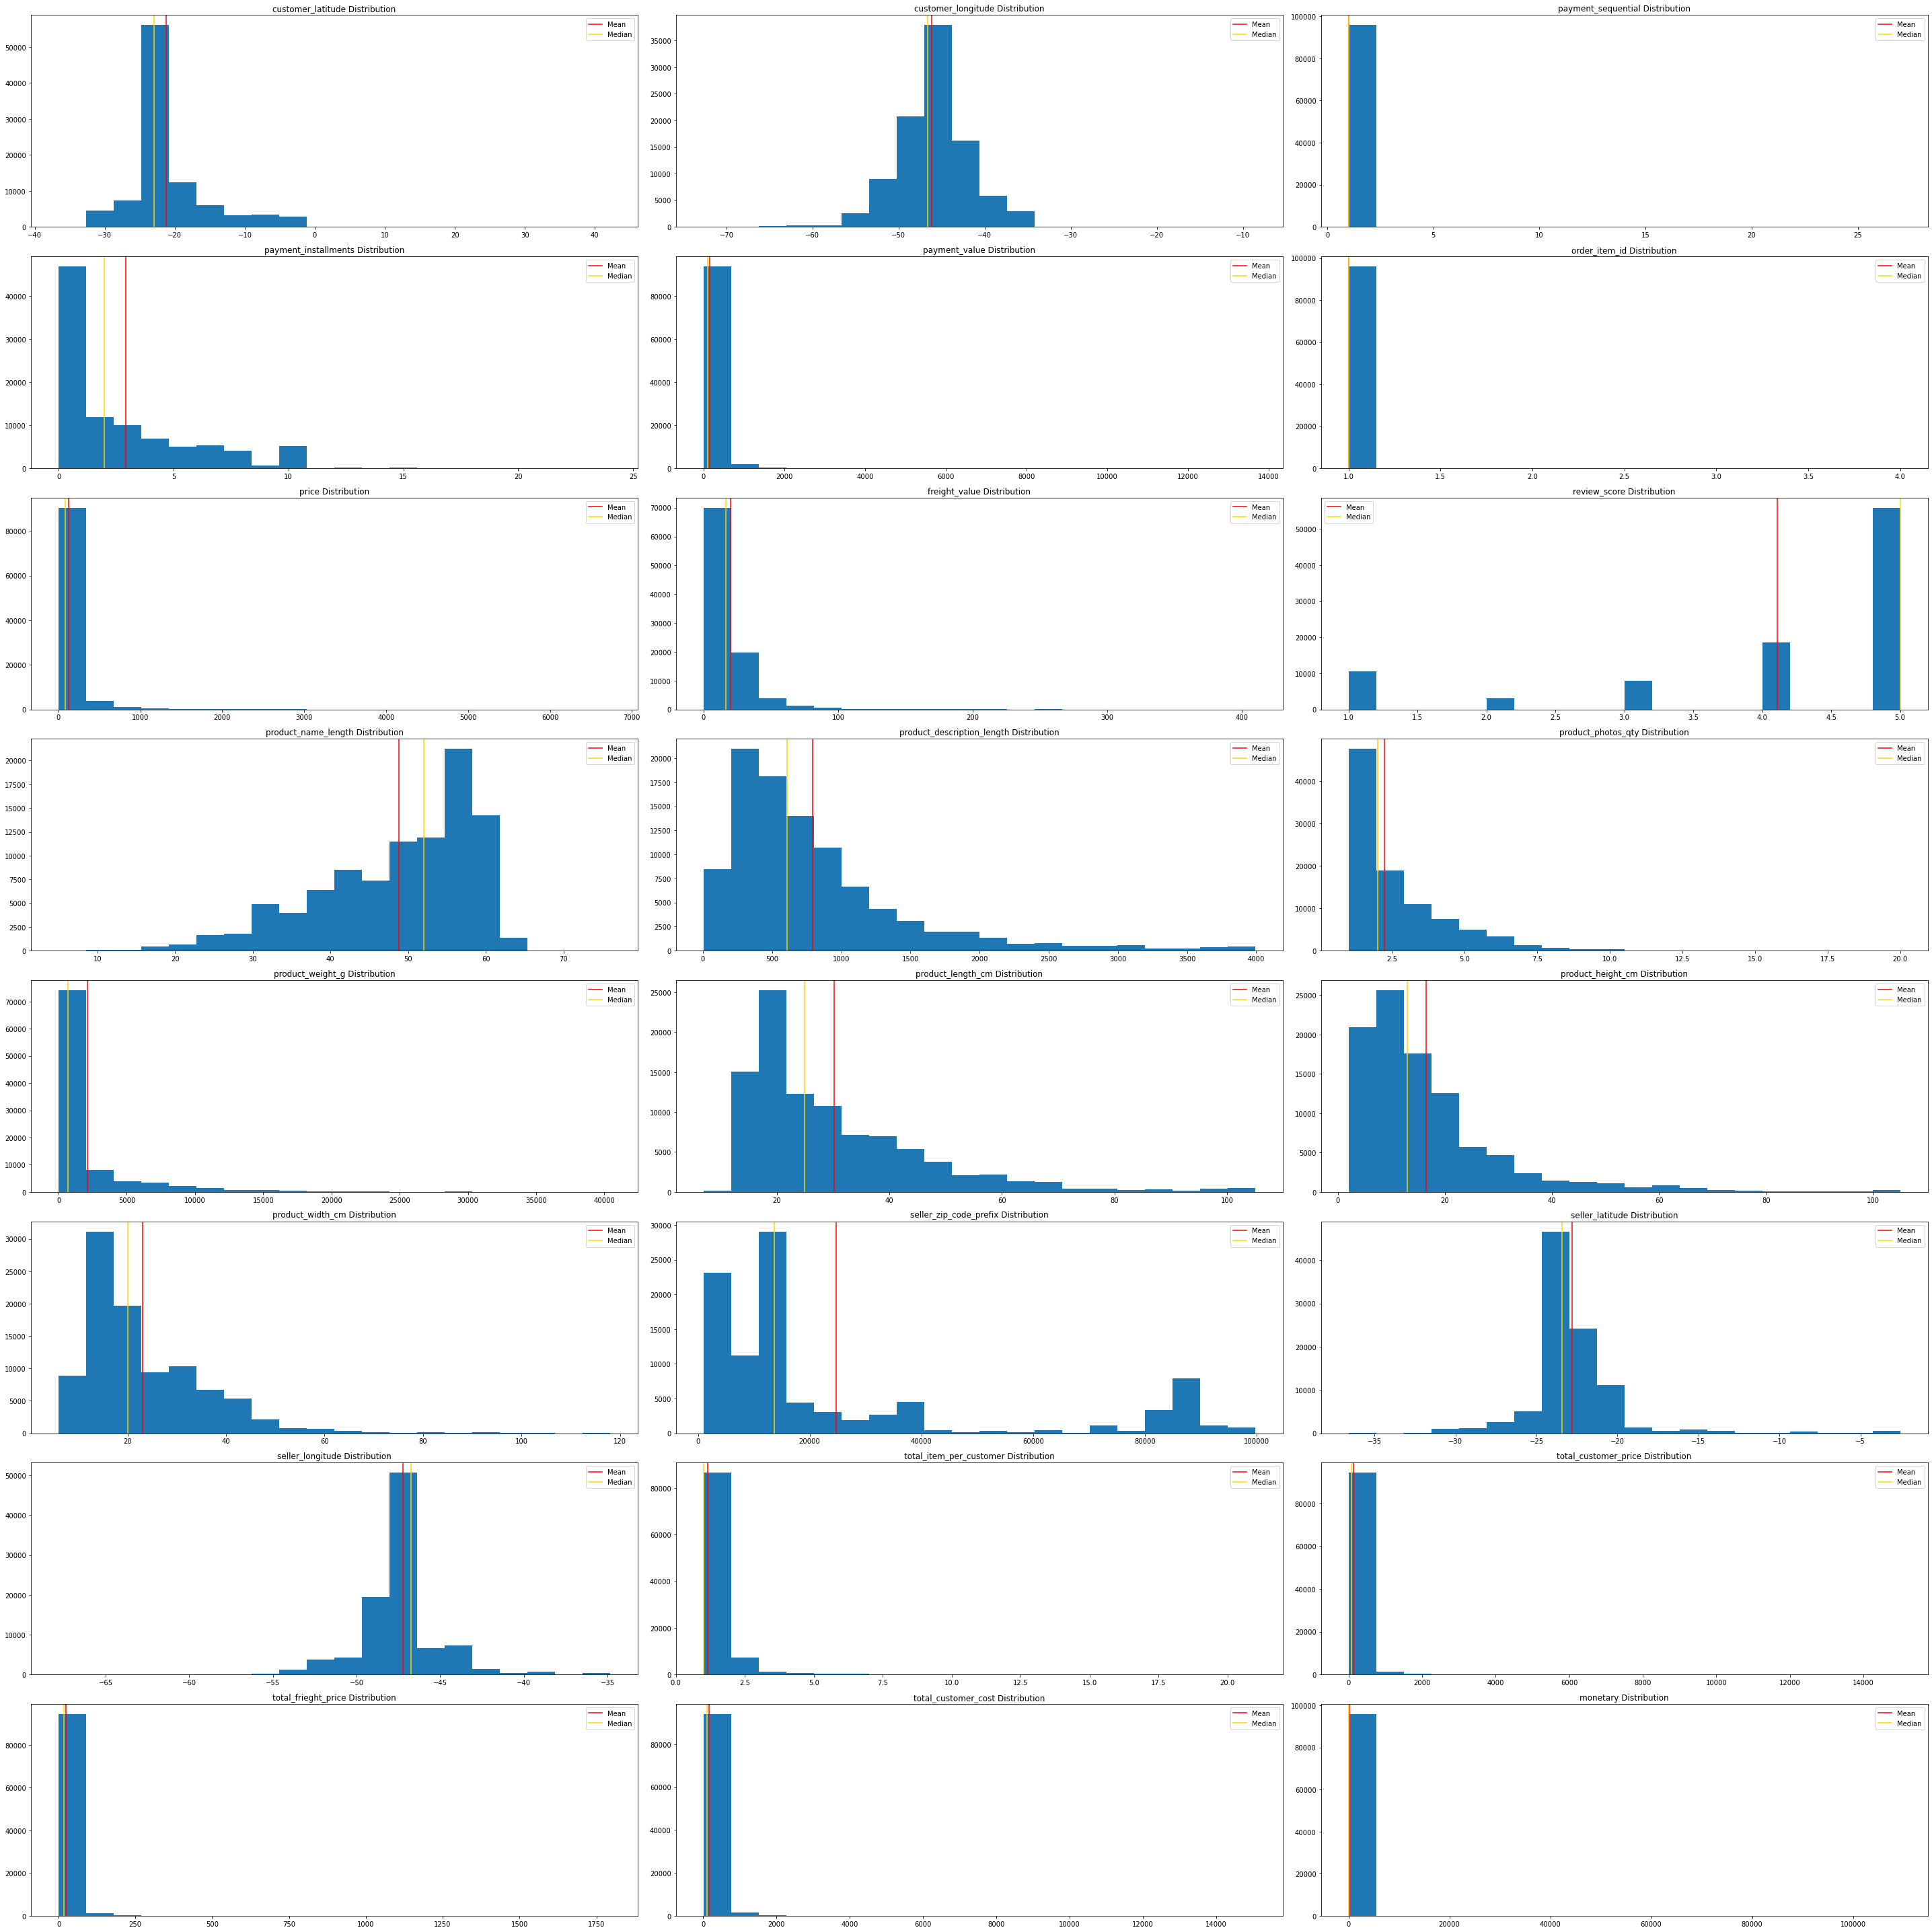

In [14]:
# plot the distribution for numeric columns 

plt.subplots(8,3,figsize=(40,40))

for slot_num, each_col in enumerate(numeric_df.columns, start=1):
    
    plt.subplot(8,3,slot_num)
    plt.hist(numeric_df[each_col], bins=20)
    
    plt.title(f'{each_col} Distribution')
    
    plt.axvline(numeric_df[each_col].mean(), c='red', label='Mean')
    plt.axvline(numeric_df[each_col].median(), c='gold', label='Median')
    
    plt.legend()
    
plt.tight_layout()

plt.show()

The distribution of the numeric columns seems to be either skewed to the left or right except for location - longitude and latitude of both sellers and customers.
1. Most of the payments were made in one instalment and others spread with low occurence but overall, payment instalments has a mean of ~2.5 times.
2. The highest review score was at 5, with a very wide difference between 5 and next score at 4 with lowest being 2 and a mean of 4.0.
3. Payment sequence is highly skewed at 1 or 2.

Let us check how the numeric columns are correlated.

In [15]:
# see the correlation
numeric_df.corr()

,customer_latitude,customer_longitude,payment_sequential,payment_installments,payment_value,order_item_id,price,freight_value,review_score,product_name_length,...,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_latitude,seller_longitude,total_item_per_customer,total_customer_price,total_frieght_price,total_customer_cost,monetary
customer_latitude,1.000000,0.453671,0.002868,0.062546,0.067614,-0.005765,0.053712,0.272057,-0.044181,0.013508,...,-0.008895,-0.024471,-0.035258,0.086795,0.086680,-0.018686,0.050007,0.209486,0.068566,0.021163
customer_longitude,0.453671,1.000000,0.006584,0.037593,0.018048,-0.004195,0.015607,0.091851,-0.052668,-0.001693,...,-0.008856,-0.008177,-0.034670,0.076102,0.083061,-0.016280,0.012973,0.067693,0.019108,0.004062
payment_sequential,0.002868,0.006584,1.000000,-0.056468,-0.038883,0.002705,0.005201,0.010693,-0.002946,0.001931,...,0.008584,0.009417,0.000558,0.003286,0.000046,-0.001404,0.004265,0.008564,0.004928,0.000623
payment_installments,0.062546,0.037593,-0.056468,1.000000,0.324918,-0.002951,0.315250,0.207733,-0.032646,0.020251,...,0.135820,0.148533,0.043963,0.011062,-0.006859,0.067362,0.303120,0.192463,0.309049,0.144326
payment_value,0.067614,0.018048,-0.038883,0.324918,1.000000,0.010593,0.906626,0.454159,-0.046212,0.012554,...,0.249896,0.184646,0.089079,0.018770,0.037150,0.191480,0.964022,0.478094,0.969620,0.618333
order_item_id,-0.005765,-0.004195,0.002705,-0.002951,0.010593,1.000000,-0.005698,-0.005516,-0.016842,-0.000818,...,-0.002413,-0.002500,-0.002462,0.000915,0.002519,0.057598,0.007759,0.008287,0.008243,0.024568
price,0.053712,0.015607,0.005201,0.315250,0.906626,-0.005698,1.000000,0.421011,-0.012913,0.014985,...,0.234656,0.174138,0.085423,0.019010,0.046307,-0.056619,0.915139,0.293391,0.904580,0.339620
freight_value,0.272057,0.091851,0.010693,0.207733,0.454159,-0.005516,0.421011,1.000000,-0.039640,0.024539,...,0.393462,0.329409,0.160279,0.039147,-0.009778,-0.024881,0.387039,0.797203,0.449158,0.178970
review_score,-0.044181,-0.052668,-0.002946,-0.032646,-0.046212,-0.016842,-0.012913,-0.039640,1.000000,-0.009392,...,-0.024012,-0.014897,0.024181,-0.011650,0.010525,-0.114307,-0.040406,-0.087377,-0.047302,-0.059199
product_name_length,0.013508,-0.001693,0.001931,0.020251,0.012554,-0.000818,0.014985,0.024539,-0.009392,1.000000,...,-0.016272,0.062369,-0.029825,0.000508,-0.057967,-0.013084,0.012817,0.012250,0.013474,0.000336


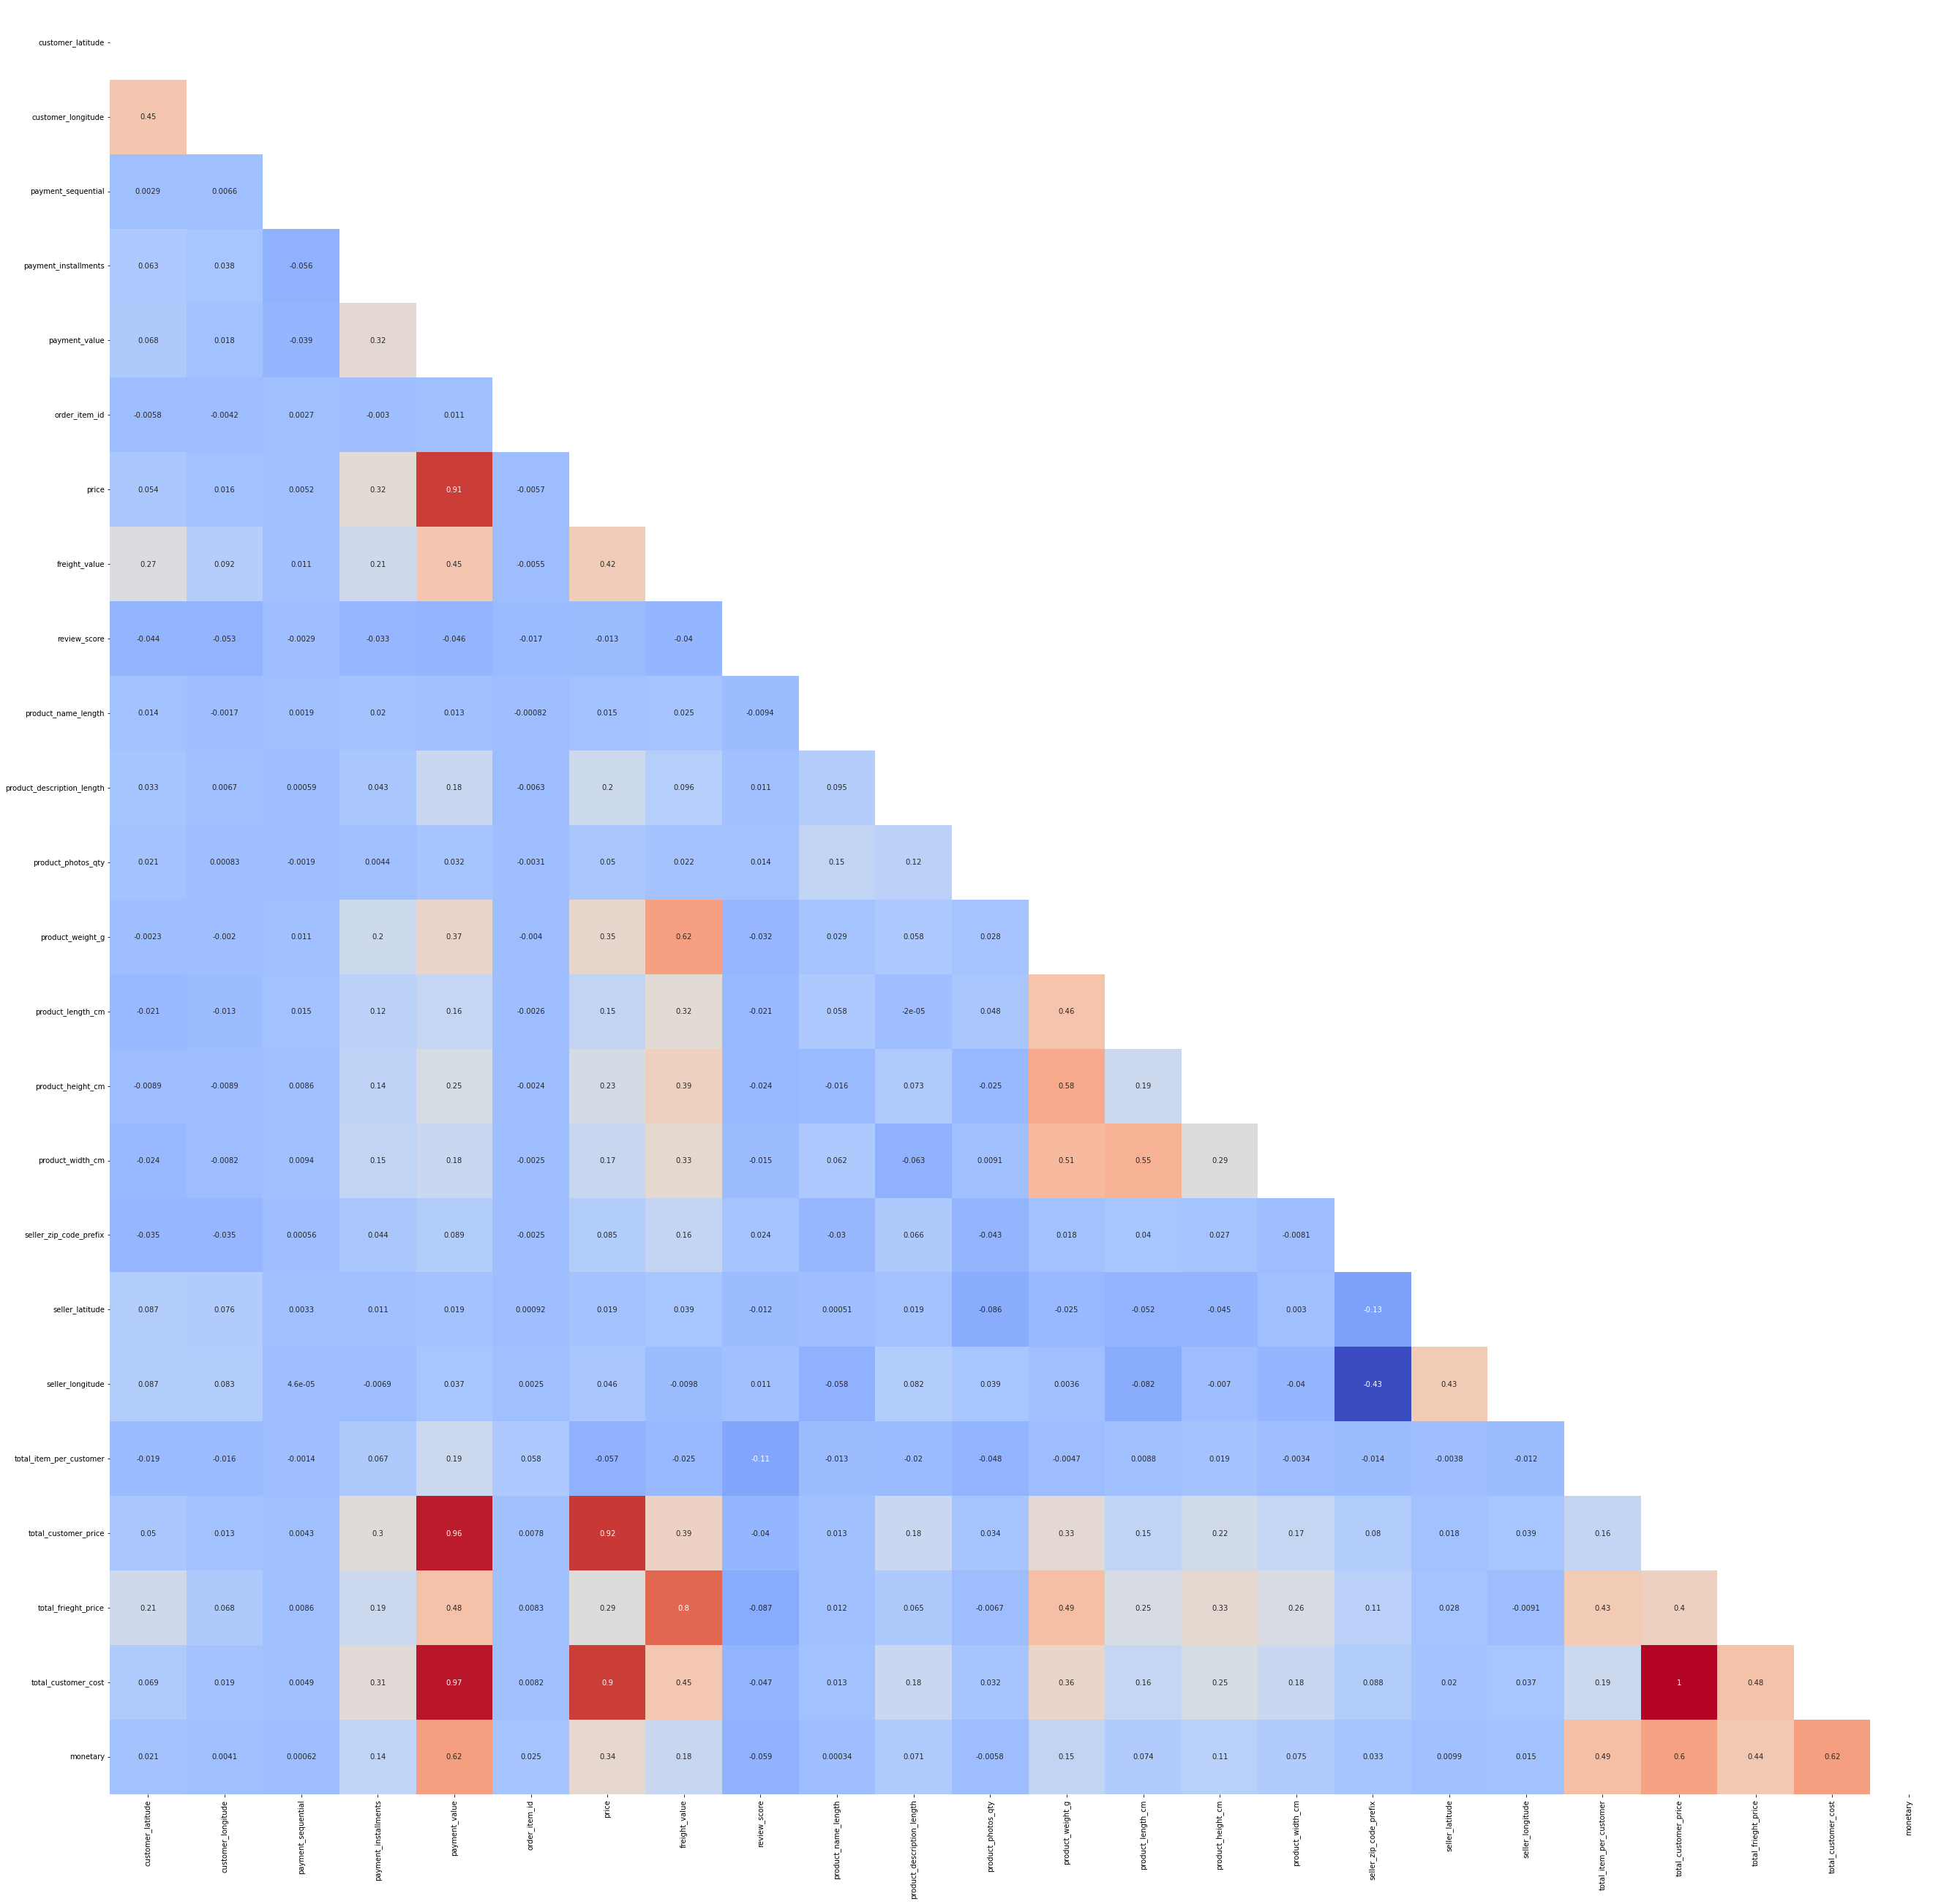

In [16]:
# Visualising correlation with heatmap
mask = np.triu(numeric_df.corr())

plt.figure(figsize= (45,45))
sns.heatmap(numeric_df.corr(), cmap='coolwarm',annot=True,  mask = mask, cbar = False)
plt.show()

1. Payment value, price, total customer price and cost are highly positively correlated (0.97). This is expected because customer price and cost were generated from price and payment value.
2. Monetary is positively correlated with payment value (0.62), total customer price (0.6) and cost (0.62). 
3. As expected, product width and weight are correlated (0.51),height and width at 0.55, weight and height at 0.58. 
4. Freight value has correlation with product weight (0.62) which is not surprising, we will expect shipping price of the heavier products to cost more. 

We have an overview of what our dataset variables are, how they are distributed and the relationship with one another. Since the main goal of this project is to predict customer churn, using churn feature let us have a look at some features that may likely give us an insight to why customers may churn. 

The features we will explore are: 

1. delivery difference - this feature was created as the difference between estimated delivery and when the order was recieved by the customer.
2. review score - will churn class give a lower score?
3. price and freight value - the shipping costs and price of product

Let us look at the delivery time difference. First, we will summarise the column (Statistics summary).

In [17]:
#Summarizing the delivery time:
df['delivery_time_diff'].describe()

count    96035.000000
mean         9.919675
std         34.090400
min       -636.000000
25%          6.000000
50%         11.000000
75%         16.000000
max        568.000000
Name: delivery_time_diff, dtype: float64

We have a negative value as the minimum. This implies non-delivered order, possibly canceled or was not registered as being delivered. Th emaen delivery is at ~10 days.

Let us have a look at the distribution.

/Users/dolphin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


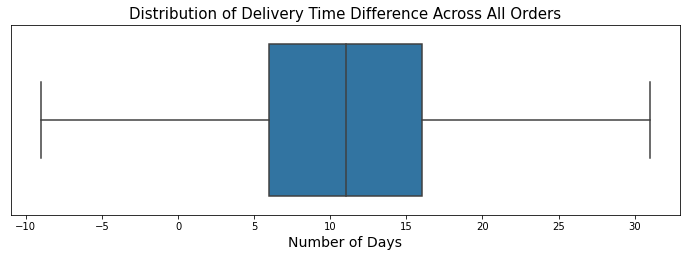

In [18]:
#Plotting the boxplot for the delivery time:
plt.figure(figsize = (12, 3.5))
sns.boxplot(df.delivery_time_diff, orient = 'h', showfliers = False)
plt.xlabel("Number of Days", fontsize = 14)
plt.yticks([])
plt.title('Distribution of Delivery Time Difference Across All Orders', fontsize = 15)
plt.show()

The delivery median is at ~11 days. The majority of orders were delivered between ~6 - 16 days but some orders did not get delivered till 30 days after! This is too long and some orders never get delivered. 

Let us have a look if the delivery time difference have an impact on churn of no-churn.

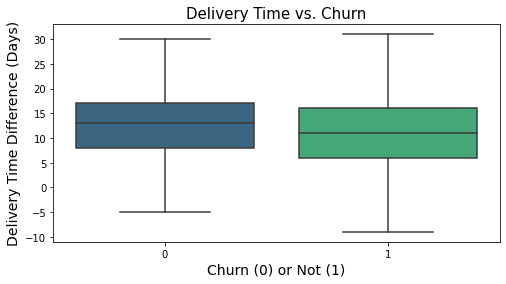

In [19]:
plt.figure(figsize = (8, 4))
sns.boxplot(x = "churn", y = "delivery_time_diff", data = df, showfliers = False, palette = 'viridis')
plt.xlabel("Churn (0) or Not (1)", fontsize = 14)
plt.ylabel("Delivery Time Difference (Days)", fontsize = 14)
plt.title("Delivery Time vs. Churn", fontsize = 15)
plt.show()

The delivery time for both classes seem similar. Both classes has delivery for as highas 30days but the median for churn is little higher ~ 14days than for no-churn (~11 days). We are not sure if the difference in delivery contributes to churn or not.   

But what if delivery day was higher than 75% interquartile range = 16 days? 

Let us have a look.

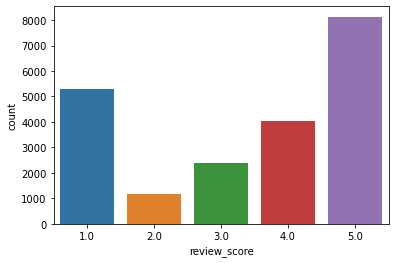

In [20]:
df_outlier_devlivery = df[df['customer_delivery_time'] > 16 ]
sns.countplot(x='review_score', data=df_outlier_devlivery);

Negative review score definitely increased when delivery was late. Therefore, delivery may contribute to customer dissatisfaction.

Let us explore review score. First, we will plot the review score, then have a look at review score of class 0 -churn vs 1 - no churn.

Text(0, 0.5, 'count')

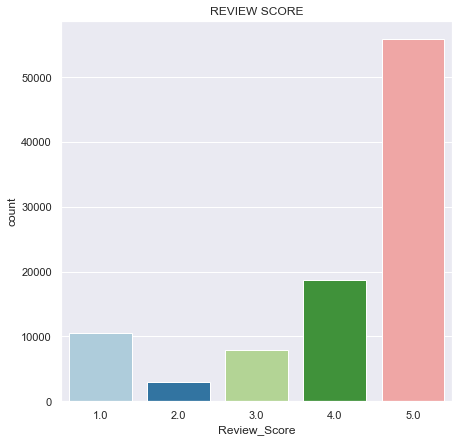

In [21]:
# plot review score
plt.figure(figsize= (7,7))
sns.set(font_scale=1)
sns.countplot(x='review_score', data=df, palette='Paired')
plt.title("REVIEW SCORE", size=12)
plt.xlabel('Review_Score', size = 12)
plt.ylabel('count', size = 12)

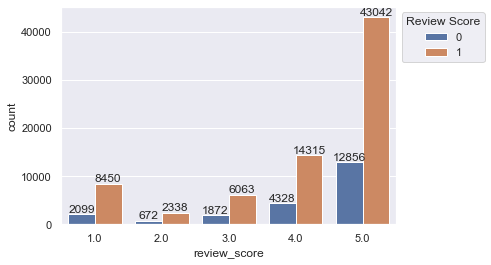

In [22]:
# plot review score and churn or no-churn
p = sns.countplot(data=df, x='review_score', hue='churn')
p.legend(title='Review Score', bbox_to_anchor=(1, 1), loc='upper left')

for c in p.containers:
    # set the bar label
    p.bar_label(c, fmt='%.0f', label_type='edge')


From the figure, both classes gave reviews similar to the normal review distribution. Majority of churn class gave very good reviews, (both 4.0 and 5.0). Therefore, it is evidnet that the customers that are likely to churn gave both high and low review scores. 

Next, let us see if high pricing and shipping cost have an effect on our churn class. 

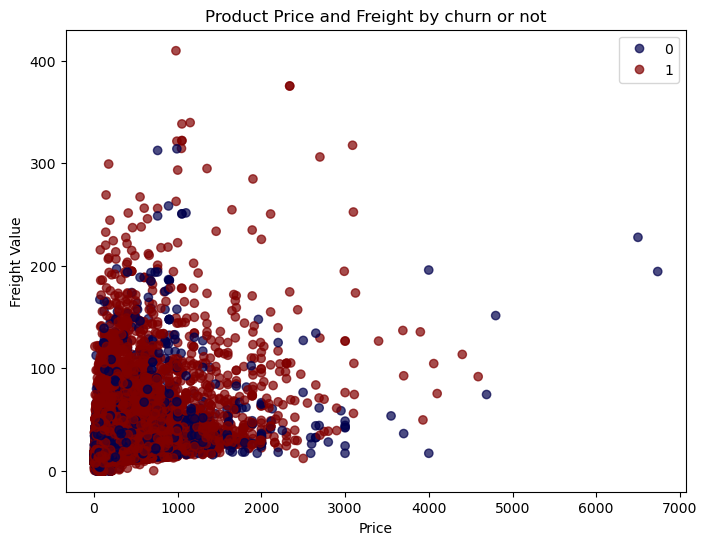

In [23]:
# plot freight and price vs churn
plt.style.use("default")
plt.figure(figsize=(8,6)) 
scatter = plt.scatter(df['price'], df['freight_value'], 
            alpha = 0.7, c = df['churn'], cmap = "seismic" 
            )
plt.xlabel("Price")
plt.ylabel("Freight Value")
plt.title("Product Price and Freight by churn or not")
plt.legend(*scatter.legend_elements())
plt.show()

Most of our class labels (0 and 1) clustered at the low prices (0 - 2000) and low freight values (0 - 200). Some data points from churn (class 0) are at the far end of very high price (but not shipping cost) and some are between 2000 - 3000)price. Also, few datapoints are above 200 freight value. It is possible that high price and freight value contribute to customers' dissatisfaction.

Let us see other important features that will help will business growth. First, the number of orders per year and secondly the total revenue generated by churn and no churn class.

In [24]:
# check the number of orders per year.
orders_by_Year = df.groupby(df.order_purchase_year)['order_id'].nunique()
orders_by_Year

order_purchase_year
2016      304
2017    43190
2018    52541
Name: order_id, dtype: int64

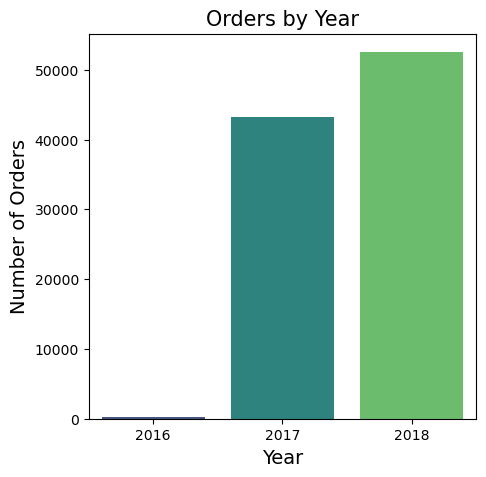

In [25]:
# plot the result above
orders_by_Year = df.groupby(df.order_purchase_year)['order_id'].nunique().reset_index()
plt.figure(figsize = (5, 5))
sns.barplot(x = 'order_purchase_year', y = 'order_id', data = orders_by_Year, palette = 'viridis')
plt.xlabel("Year", fontsize = 14)
plt.ylabel("Number of Orders", fontsize = 14)
plt.title("Orders by Year", fontsize = 15)
plt.show()

If we recall, the dataset covered late 2016 (September), the whole of 2017 and 2018 September. There was barely order for 2016, maybe the first year of Olist. There is an increase in the number of orders in 2018 compared to 2017, which implies Olist growth.

In [26]:
# plot revenue genarated by both classes
churn_revenue = df.groupby(df.churn)['total_customer_cost'].nunique()
churn_revenue

churn
0    10249
1    24471
Name: total_customer_cost, dtype: int64

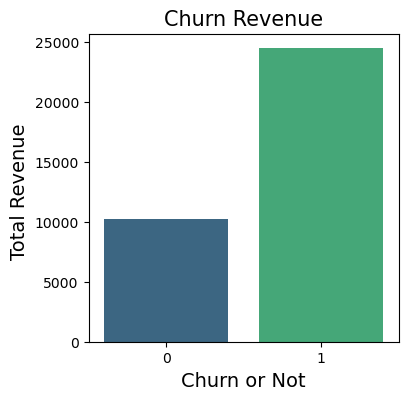

In [27]:
churn_revenue = df.groupby(df.churn)['total_customer_cost'].nunique().reset_index()
plt.figure(figsize = (4, 4))
sns.barplot(x = 'churn', y = 'total_customer_cost', data = churn_revenue, palette = 'viridis')
plt.xlabel("Churn or Not", fontsize = 14)
plt.ylabel("Total Revenue ", fontsize = 14)
plt.title("Churn Revenue", fontsize = 15)
plt.show()

Churn class 0 contributed 10,249 (29.5%)to the total revenue generated! This is alot. 

### Conclusion

In this notebook, we were able to see the distribution of both categorical and numeric variables. We also explore the correlation between our variables and most importantly, variables that may contribute to customer churn. The delivery time, pricing and freight may contribute to some customers dissatisfaction or churn.

Moreover, it is very important to correctly classify and identify customers that will likey churn because they contribute significantly to the revenue of Olist. 

We will explore models that will help in predicting churn in the next notebook - **notebook #4**.